# Decision Trees & Random Forest: Progetto Portfolio 

In questo progetto portfolio si analizzeranno dei dati pubblici provenienti da [LendingClub.com](www.lendingclub.com), che connette persone bisognose di denaro (borrowers) con persone che ce l'hanno (investors). Un investor deve tendere a prestare denaro ai borrowers che hanno più probabilità di restituirlo. Lo scopo del progetto portfolio è quello di creare un modello di machine learning che aiuti a prevedere se un borrower ripagherà totalmente o meno il denaro ricevuto, in particolare gli algoritmi usati saranno i Decision Tree e il Random Forest.

Lending Club ha avuto [un anno particolarmente problematico nel 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), noi useremo dati di prestito dal 2007 al 2010.

Il dataset è composto dalle seguenti feature:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Importare librerie

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Ottenere i dati

In [3]:
loans = pd.read_csv('loan_data.csv')

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis

Si faccia un conteggio della classe target per verificare se sia bilanciata o meno.

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

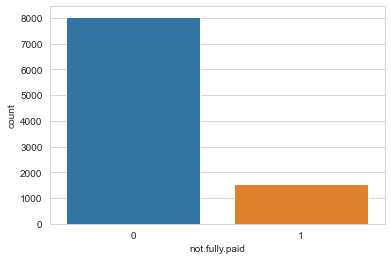

In [7]:
sns.countplot(data=loans,x='not.fully.paid')

**Sembrano sbilanciate, in pochi non restituiscono tutto il denaro prestato. Verifico le percentuali.**

In [8]:
print('La percentuale di casi in cui il denaro è stato restituito totalmente: ',round(100*len(loans[loans['not.fully.paid']==0])/len(loans),ndigits=3))
print('La percentuale di casi in cui il denaro NON è stato restituito totalmente: ',round(100*len(loans[loans['not.fully.paid']==1])/len(loans),ndigits=3))

La percentuale di casi in cui il denaro è stato restituito totalmente:  83.995
La percentuale di casi in cui il denaro NON è stato restituito totalmente:  16.005


**Come visivamente si era intuito la target class nel dataset è molto sbilanciata. Ci si deve aspettare che l'algoritmo non sarà in grado di prevedere bene la classe 'not.fully.paid'=1.**

Si confrontano il credit score FICO dei borrower distinguendo i casi in cui rispettino o meno i criteri della Lending Club.

Text(0, 0.5, '')

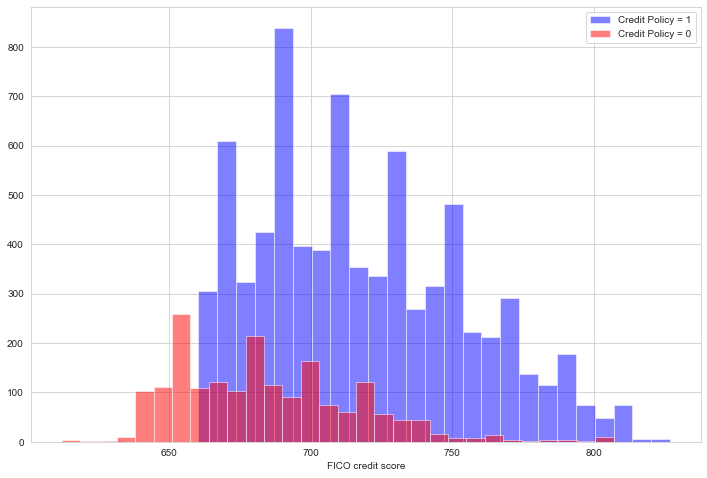

In [9]:
plt.figure(figsize=(12,8))

loans[loans['credit.policy']==1]['fico'].plot.hist(bins=30,color='blue',label='Credit Policy = 1',alpha=0.5)
loans[loans['credit.policy']==0]['fico'].plot.hist(bins=30,color='red',label='Credit Policy = 0',alpha=0.5)

plt.legend()
plt.xlabel('FICO credit score')
plt.ylabel('')

**Si nota come i FICO credit score di chi non rispecchia i criteri della Lending Club abbiano una distribuzione più spostata verso punteggi bassi rispetto a chi li rispecchia. I picchi nelle distribuzioni dipendono da come vengono assegnati gli score FICO.**

Si ripete lo stesso grafico, ma come hue si utilizza il fatto che abbiano restituito completamente o meno il prestito.

Text(0, 0.5, '')

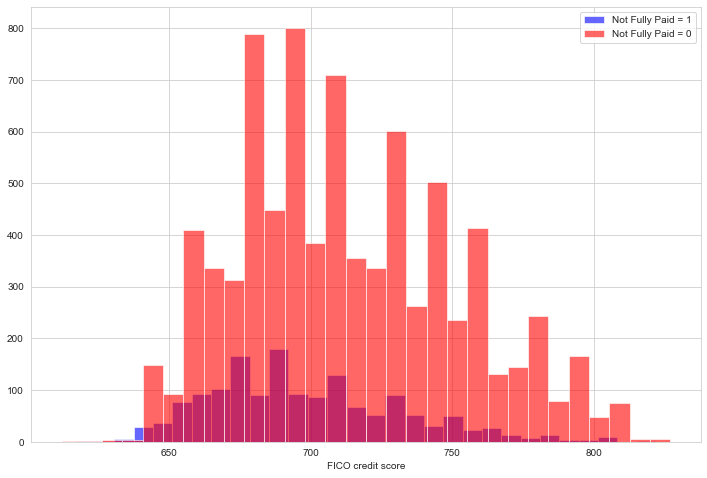

In [10]:
plt.figure(figsize=(12,8))

loans[loans['not.fully.paid']==1]['fico'].plot.hist(bins=30,color='blue',label='Not Fully Paid = 1',alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].plot.hist(bins=30,color='red',label='Not Fully Paid = 0',alpha=0.6)

plt.legend()
plt.xlabel('FICO credit score')
plt.ylabel('')

**In questo caso le distribuzioni sono simili in entrambi i casi. Si può notare che a punteggi FICO più alti il rapporto prestito completamente restituito contro non restituito totalmente aumenti, come ci si poteva aspettare.**

Si conta il numero di prestiti per ragione del prestito, distinguendo in ogni caso se il debito è stato totalmente sanato o meno.

<AxesSubplot:xlabel='purpose', ylabel='count'>

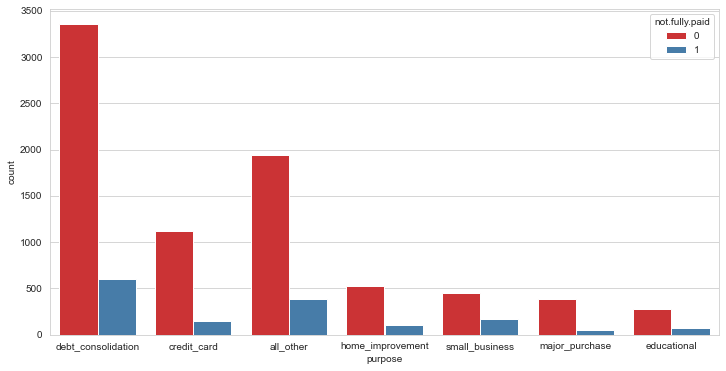

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=loans,x='purpose',hue='not.fully.paid',palette='Set1')

**Per analizzare meglio si esplicitano le percentuali relative**

In [25]:
print('Percentuale restituiti totalmente per \'debt_consolidation\': ', 
      round(100*(sum(loans[loans['purpose']=='debt_consolidation']['not.fully.paid'] == 0)/len(loans[loans['purpose']=='debt_consolidation']['not.fully.paid'])),ndigits=3))

print('Percentuale restituiti totalmente per \'credit_card\': ', 
      round(100*(sum(loans[loans['purpose']=='credit_card']['not.fully.paid'] == 0)/len(loans[loans['purpose']=='credit_card']['not.fully.paid'])),ndigits=3))

print('Percentuale restituiti totalmente per \'all_other\': ', 
      round(100*(sum(loans[loans['purpose']=='all_other']['not.fully.paid'] == 0)/len(loans[loans['purpose']=='all_other']['not.fully.paid'])),ndigits=3))

print('Percentuale restituiti totalmente per \'home_improvement\': ', 
      round(100*(sum(loans[loans['purpose']=='home_improvement']['not.fully.paid'] == 0)/len(loans[loans['purpose']=='home_improvement']['not.fully.paid'])),ndigits=3))

print('Percentuale restituiti totalmente per \'small_business\': ', 
      round(100*(sum(loans[loans['purpose']=='small_business']['not.fully.paid'] == 0)/len(loans[loans['purpose']=='small_business']['not.fully.paid'])),ndigits=3))

print('Percentuale restituiti totalmente per \'major_purchase\': ', 
      round(100*(sum(loans[loans['purpose']=='major_purchase']['not.fully.paid'] == 0)/len(loans[loans['purpose']=='major_purchase']['not.fully.paid'])),ndigits=3))

print('Percentuale restituiti totalmente per \'educational\': ', 
      round(100*(sum(loans[loans['purpose']=='educational']['not.fully.paid'] == 0)/len(loans[loans['purpose']=='educational']['not.fully.paid'])),ndigits=3))

Percentuale restituiti totalmente per 'debt_consolidation':  84.761
Percentuale restituiti totalmente per 'credit_card':  88.431
Percentuale restituiti totalmente per 'all_other':  83.398
Percentuale restituiti totalmente per 'home_improvement':  82.989
Percentuale restituiti totalmente per 'small_business':  72.213
Percentuale restituiti totalmente per 'major_purchase':  88.787
Percentuale restituiti totalmente per 'educational':  79.883


**La ragione del prestito più rischiosa per la restituzione totale dello stesso pare essere per le piccole imprese ('small_business'), mentre quelle più sicure sono 'credit_card' e 'major_purchase'.**

Si analizza la possibile correlazione fra il FICO credit score e il tasso di interesse del prestito.

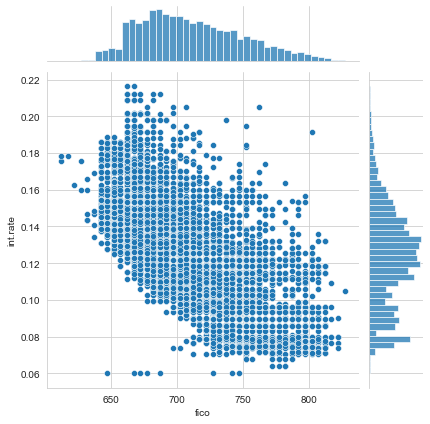

In [27]:
sns.jointplot(data=loans,x='fico',y='int.rate')

**Come ci si poteva aspettare per score FICO bassi il tasso di interesse è più alto e viceversa. Ne studio l'andamento distinguendo sia per la colonna 'not.fully.paid' che per la 'credit.policy'.**

<Figure size 792x504 with 0 Axes>

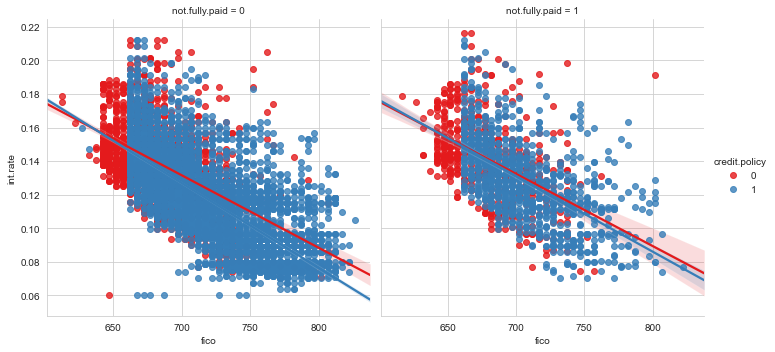

In [26]:
plt.figure(figsize=(11,7))
sns.lmplot(data=loans,x='fico',y='int.rate',col='not.fully.paid',hue='credit.policy',palette='Set1',truncate=False)

**L'andamento decrescente comune a tutti i casi è confermato. Si può notare come per i borrowers che non rispettano le policy di Lending Club il coefficiente del fit lineare è lo stesso, sia nel caso in cui abbiano restituito il debito totalmente che non. Interessante notare come, invece, per i casi che rispettano le policy i tassi di interesse a punteggi FICO alti nel caso in cui il debito non sia stato restituito totalmente siano più alti rispetto al caso in cui sia stato ripagato del tutto.**

## Feature Engineering

Richiamare il metodo .info().

In [28]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**La feature 'purpose' vista in precedenza è composta da stringhe (categorical feature), che non vanno bene per algoritmi di machine learning. È necessario un encoding che lo porti in un formato accettabile, andremo con un semplice one-hot encoding.**

In [31]:
final_loans = pd.get_dummies(loans,columns=['purpose'],drop_first=True)

In [32]:
final_loans

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


## Training & Testing Data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = final_loans.drop('not.fully.paid',axis=1)
y = final_loans['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree: Model Training 

Per prima cosa si tratta il modello composto da un singolo albero decisionale\Decision Tree. Lo si allena e se ne valutano le performance.

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Decision Tree: Performance del Modello

In [38]:
pred = dtree.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2408
           1       0.21      0.22      0.22       466

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.74      0.74      2874



**Come mi aspettavo il potere predittivo per la categoria 1 non è molto buono, basti guardare ad esempio l'f1-score nel classification report. Lo si vede ancora meglio con la confusion matrix.**

In [41]:
print(confusion_matrix(y_test,pred))

[[2020  388]
 [ 362  104]]


Text(0.5, 1.0, 'Decision Tree: Confusion Matrix in percentuali')

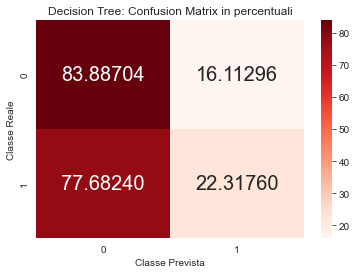

In [50]:
conf_mat = confusion_matrix(y_test,pred)
conf_mat = 100*(conf_mat.astype('float')/conf_mat.sum(axis=1)[:,np.newaxis])

sns.heatmap(conf_mat,annot=True,cmap='Reds',fmt='.5f',annot_kws={'size':20})
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Reale')
plt.title('Decision Tree: Confusion Matrix in percentuali')

## Random Forest: Model Training

Si rifà lo stesso procedimento con il Random Forest e lo si confronta con il Decision Tree.

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=600)

**Scelgo un numero di estimators arbitrariamente grande e vedo come funziona il modello.**

In [46]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Random Forest: Performance del Modello

In [47]:
predict = rf.predict(X_test)

In [48]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.41      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874



**Sebbene parrebbe funzionare meglio dall'accuracy e dalle medie pesate e in generale predice meglio del Decision Tree per la categoria 0, la categoria 1 è un grave problema per l'algoritmo di Random Forest!**

In [49]:
print(confusion_matrix(y_test,predict))

[[2395   13]
 [ 457    9]]


Text(0.5, 1.0, 'Random Forest: Confusion Matrix in percentuali')

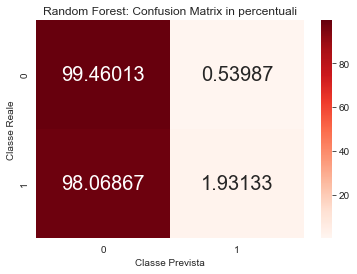

In [51]:
conf_mat = confusion_matrix(y_test,predict)
conf_mat = 100*(conf_mat.astype('float')/conf_mat.sum(axis=1)[:,np.newaxis])

sns.heatmap(conf_mat,annot=True,cmap='Reds',fmt='.5f',annot_kws={'size':20})
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Reale')
plt.title('Random Forest: Confusion Matrix in percentuali')

**La categoria 0 è predetta quasi perfettamente, mentre la 1 esattamente al contrario. Questo probabilmente perché il dataset era sbilanciato e perché non si è andati ad ottimizzare il numero di estimators nell'algoritmo di Random Forest.**

**Se si necessitasse decidere quale algoritmo abbia le migliori performance, bisognerebbe sapere la metric\grandezza statistica che va ottimizzata. Ad esempio la recall di entrambi i modelli è pessima, sebbene quella del singolo Decision Tree sia in qualche modo migliore. Per migliorare le performance dei modelli, oltre all'ottimizzazione del parametro del Random Forest, si potrebbe proseguire con un maggior feature engineering del dataset.**

E qui si conclude il progetto portfolio su Decision Tree e Random Forest messi a confronto con un dataset reale.